# 🚀 Disney+ Intermediate Analysis (Phase 3)
In this notebook, we explore Disney+ content trends through deeper analysis and visual storytelling. This level of insight is designed to be **GitHub- and LinkedIn-ready** — informative, insightful, and visually polished.

**Goals:**
- Understand content distribution over time
- Explore genre popularity trends
- Investigate content ratings and country breakdowns
- Enhance readability and presentation for a portfolio

Dataset: Cleaned Disney+ dataset with metadata such as type, release year, rating, duration, and genre.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load cleaned dataset
df = pd.read_csv(r'C:\Users\camro\OneDrive\Github Project1\data\disney_plus_titles.csv')

# Convert to datetime and create year column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021.0
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021.0
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021.0
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021.0
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,2021.0


## 1. Movies vs TV Shows Over Time
We examine the number of movies and TV shows added to Disney+ by year.

📌 **Insight**: There's a major spike in 2019 (launch year), and a strong lean towards movies overall.

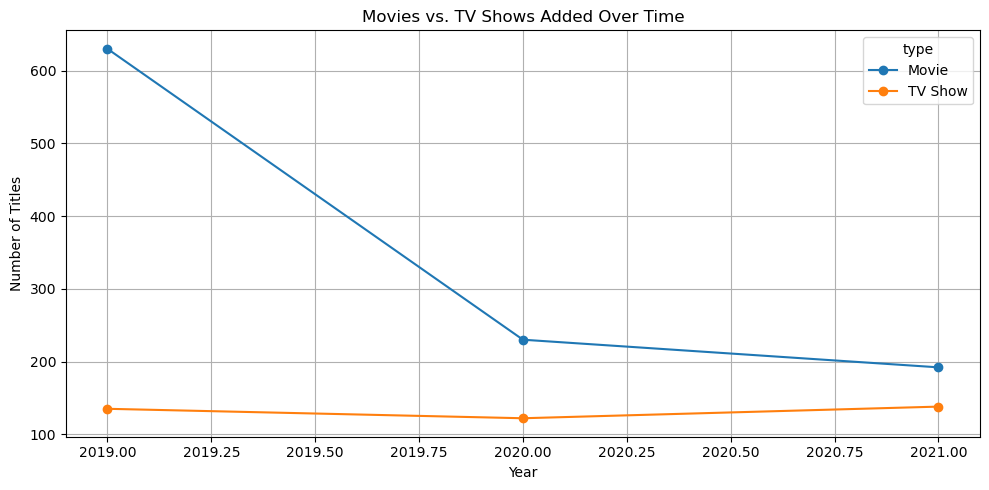

In [2]:
type_trends = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
type_trends.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Movies vs. TV Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/movies_vs_tvshows_trend.png')
plt.show()

In [ ]:
#📈 **Movies vs. TV Shows Over Time**

#This line chart tracks content addition trends across years. Disney+ heavily focused on movies early on, especially in 2019. However, TV show releases have remained relatively stable, suggesting a complementary role to the platform’s film-first strategy.


## 2. Top 10 Genres
We split the `listed_in` column to determine the most frequent genres.

📌 **Insight**: Family, Animation, and Kids genres dominate, consistent with Disney+'s branding.

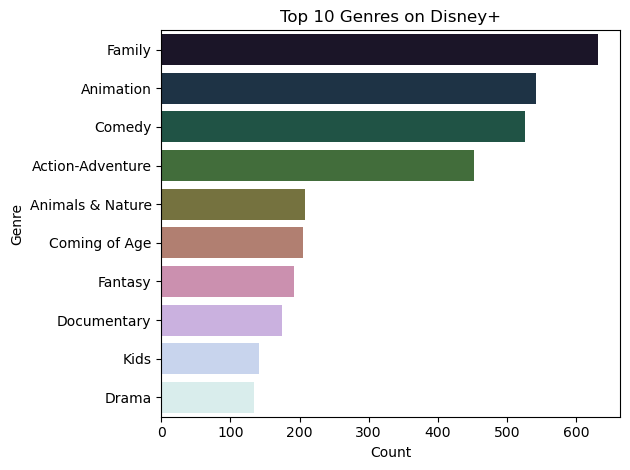

In [3]:
top_genres = df['listed_in'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='cubehelix')
plt.title('Top 10 Genres on Disney+')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.savefig('visuals/top_10_genres.png')
plt.show()

In [ ]:
#🎬 **Most Popular Genres on Disney+**

#Family content leads by a wide margin, followed by Animation and Comedy — all reinforcing Disney’s core audience of children and families. The strong presence of "Action-Adventure" and "Coming of Age" suggests a push to broaden their demographic reach.

## 3. Genre Trends Over Time
Here we track how genre popularity evolves.

📌 **Insight**: Family content is consistently high. Certain genres like documentaries and reality shows grew over time.

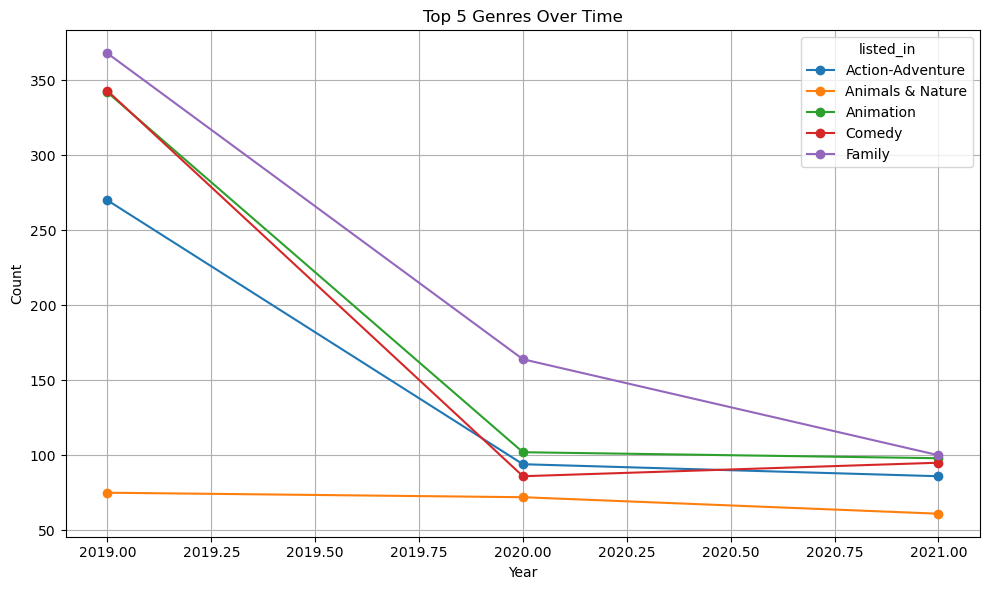

In [4]:
df_genres = df.dropna(subset=['listed_in', 'year_added'])
df_genres = df_genres.assign(listed_in=df_genres['listed_in'].str.split(', ')).explode('listed_in')
top5 = df_genres['listed_in'].value_counts().head(5).index
genre_year = df_genres[df_genres['listed_in'].isin(top5)].groupby(['year_added', 'listed_in']).size().unstack().fillna(0)
genre_year.plot(figsize=(10,6), marker='o')
plt.title('Top 5 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/genre_trends_over_time.png')
plt.show()

In [ ]:
#📉 **How Genre Popularity Has Shifted**

#Family, Comedy, and Animation peaked around 2019 but saw drops in 2020 and 2021. This could reflect Disney+ launching with its major back-catalog and slowing content additions later. Interestingly, "Animals & Nature" remained steady, suggesting lasting niche appeal.

## 4. Heatmap of Ratings by Content Type
We compare ratings across content types.

📌 **Insight**: Movies tend to have more diverse ratings; TV shows are mostly TV-G or TV-PG.

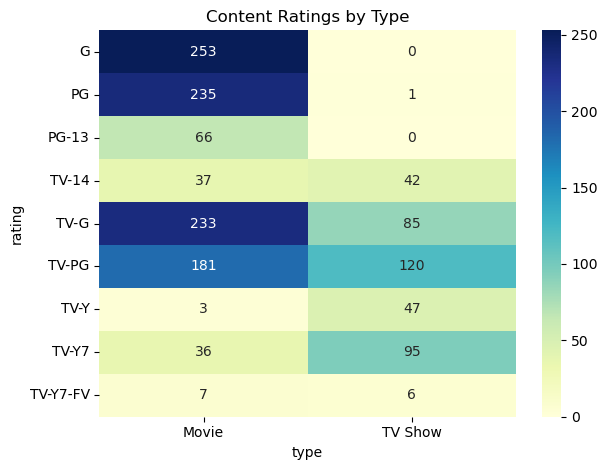

In [5]:
ratings = df.pivot_table(index='rating', columns='type', values='title', aggfunc='count').fillna(0)
sns.heatmap(ratings, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Content Ratings by Type')
plt.tight_layout()
plt.savefig('visuals/ratings_heatmap.png')
plt.show()

In [ ]:
#🧩 **Content Ratings Breakdown**

#Movies on Disney+ tend to be rated G or PG, while TV shows are more likely to fall under TV-PG or TV-Y7. This shows how ratings vary by format and help Disney manage audience expectations across content types.

## 5. Country Contributions by Content Type
Top 5 countries by content count, split by type.

📌 **Insight**: The U.S. contributes most of the content, with a strong bias toward movies.

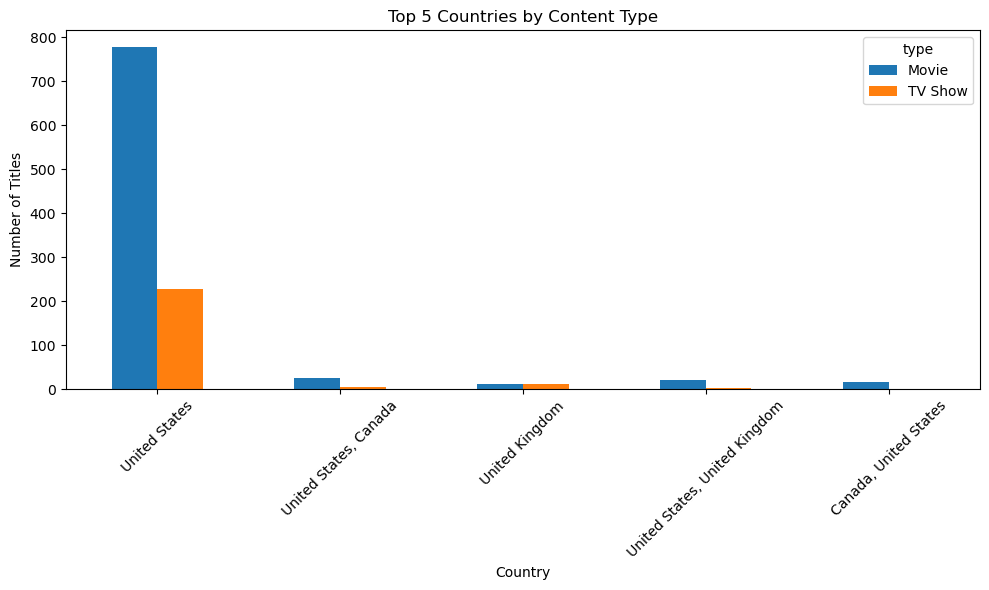

In [6]:
country_type = df.groupby(['country', 'type']).size().unstack().fillna(0)
top_countries = country_type.sum(axis=1).sort_values(ascending=False).head(5).index
country_type.loc[top_countries].plot(kind='bar', figsize=(10,6))
plt.title('Top 5 Countries by Content Type')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('visuals/country_type_barplot.png')
plt.show()

In [ ]:
#🌍 **Top 5 Countries by Content Type**

#This chart shows the top countries contributing content to Disney+, split by Movies and TV Shows. Unsurprisingly, the United States dominates in both categories, especially in movies. The UK and Canada appear in multiple joint country labels, showing regional collaboration. This reflects Disney's global footprint but also hints at a strong U.S. production bias.

## ✅ Summary & Insights
- Disney+ content is heavily focused on **movies** and **family-friendly ratings**.
- The **2019 launch** marked a peak in content additions.
- **Genres like Animation and Family** dominate the platform.
- The U.S. remains the top content producer by a wide margin.

**Next Steps**: This notebook is portfolio-ready and can be showcased on GitHub and LinkedIn with exported visuals and polished markdown summaries.